In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas.tools.plotting import table

headers=["nome", "unidade", "depto", "jornada", "categoria",
         "classe", "ref", "func", "func_estr", "tempo", "parcelas",
         "salario", "salario_liq"]
governor_salary = 21650

In [2]:
raw = pd.read_csv("USP.txt", delimiter=';', index_col=False, names=headers, header=0)

In [3]:
np.unique(raw.categoria)

array(['Celetista', 'Compl Apos', 'Doc Apos', 'Docente', 'Func Apos',
       'Func Aut'], dtype=object)

In [4]:
salario_anual_tot = np.sum(raw.salario) * 12
salario_median_tot = np.median(raw.salario)
print("%.2f %.2f" % (salario_anual_tot, salario_median_tot))

3427651958.64 8775.31


In [5]:
raw_n = raw[raw.salario > governor_salary] #salario do governador
np.sum(raw_n.salario * 12)

691372729.92000008

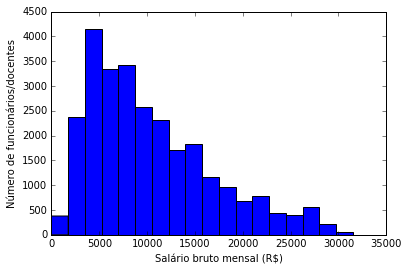

In [6]:
plt.hist(raw.salario, bins=20, range=(0, 35000))
plt.xlabel("Salário bruto mensal (R$)")
plt.ylabel("Número de funcionários/docentes")
plt.show()

In [7]:
dat = raw[(raw.categoria == "Celetista")]
#len(dat)
#np.median(dat.salario)
dat_n = dat[dat.salario > governor_salary]
len(dat_n)

109

In [8]:
len(dat_n)

109

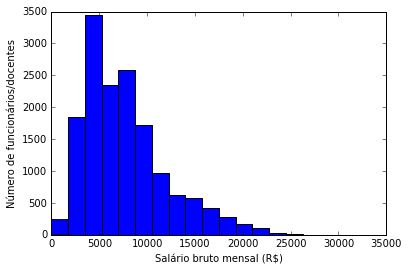

In [9]:
plt.hist(dat.salario, bins=20, range=(0, 35000))
plt.xlabel("Salário bruto mensal (R$)")
plt.ylabel("Número de funcionários/docentes")
plt.show()

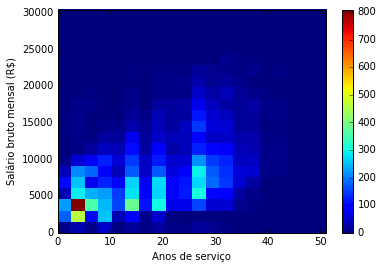

In [10]:
plt.hist2d(x=dat.tempo.values, y=dat.salario.values, bins=20)
plt.xlabel("Anos de serviço")
plt.ylabel("Salário bruto mensal (R$)")
plt.colorbar()
plt.show()

In [11]:
funcoes = np.unique(dat.func)
resul = []
resul_med = []
resul_sum = []
i = 0
for funcao in funcoes:
    resul.append([i, funcao, len(dat[dat.func == funcao])])
    resul_med.append([funcao, len(dat[dat.func == funcao]), np.median(dat[dat.func == funcao].salario)])
    resul_sum.append([i, funcao, np.sum(dat[dat.func == funcao].salario)])
    i += 1
resul = np.array(resul)
resul_med = np.array(resul_med)
resul_sum = np.array(resul_sum)

In [12]:
resul_med
dat_resul = pd.DataFrame(resul_med, columns=("Função", "Quantidade de Funcionários", "Salário Mediano"))
dat_resul.to_html("folha-usp.html")

In [13]:
resul_med

array([['Abatedor', '4', '4145.305'],
       ['Administrador', '10', '17202.615'],
       ['Advogado', '3', '2523.48'],
       ['Agente de Inovação', '5', '11926.86'],
       ['Agente de Relacoes Internacionais', '14', '3893.59'],
       ['Agente de Vigilância', '278', '8031.035'],
       ['Almoxarife', '41', '8553.73'],
       ['Analista Acadêmico', '40', '17591.01'],
       ['Analista Assuntos Administrativos', '182', '13306.96'],
       ['Analista Contábil Financeiro', '48', '15723.5'],
       ['Analista de Comunicação', '73', '12491.41'],
       ['Analista de O&M', '1', '2523.48'],
       ['Analista de Recursos Humanos', '9', '16884.98'],
       ['Analista de Sistemas', '310', '12774.185'],
       ['Armador', '2', '7404.22'],
       ['Arquiteto', '30', '10126.015'],
       ['Arte Finalista', '27', '7898.74'],
       ['Ascensorista', '3', '4382.03'],
       ['Assessor', '7', '2523.48'],
       ['Assistente Administrativo', '27', '2208.04'],
       ['Assistente Administrativo Especia

In [14]:
ndat = dat[dat.depto == "Gabinete do Reitor"]
#ndat = dat[dat.unidade == "IF"]
#ndat = ndat[ndat.func == "Zelador"]

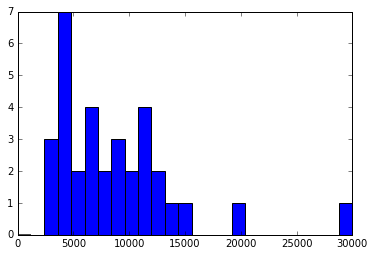

In [15]:
plt.hist(list(ndat.salario), bins=25, range=(0, 30000))
plt.show()

In [16]:
ndat.to_html("folha-gabinete-reitor.html")

In [32]:
raw[raw.nome.str.contains("")]

,nome,unidade,depto,jornada,categoria,classe,ref,func,func_estr,tempo,parcelas,salario,salario_liq
11796,Joao Grandino Rodas,FD,Inativo,RTC,Doc Apos,Prof Titular,MS-6,Professor Titular,NaN,0,0.0,18785.92,13552.74
12716,Jose Enrique Rodas Duran,FFCLRP,Inativo,RDIDP,Doc Apos,Prof Doutor,MS-5.1,Professor Associado,NaN,0,0.0,20798.10,13689.88
